# NYC 311 : Customer Service Requests Analysis

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from datetime import datetime

# Task 1: Import a 311 NYC service request

In [2]:
data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

In [3]:
data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [4]:
data.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
data.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

# Task 2: Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [7]:
data['Created Date']= pd.to_datetime(data['Created Date'], errors='coerce')

In [8]:
data['Closed Date']= pd.to_datetime(data['Closed Date'], errors='coerce')

In [9]:
data.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [10]:
data['Request_Closing_Time']= data['Closed Date'].values-data['Created Date'].values

In [11]:
data.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [12]:
data['Request_Closing_Time_mins'] = data['Request_Closing_Time']/np.timedelta64(1,'m')

In [13]:
data.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

# Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [15]:
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

# Conclusion 1: City with maximum number of complaints was found to be Brooklyn with different types of complaints

Text(0.5, 1.0, 'Number of complaints vs. City')

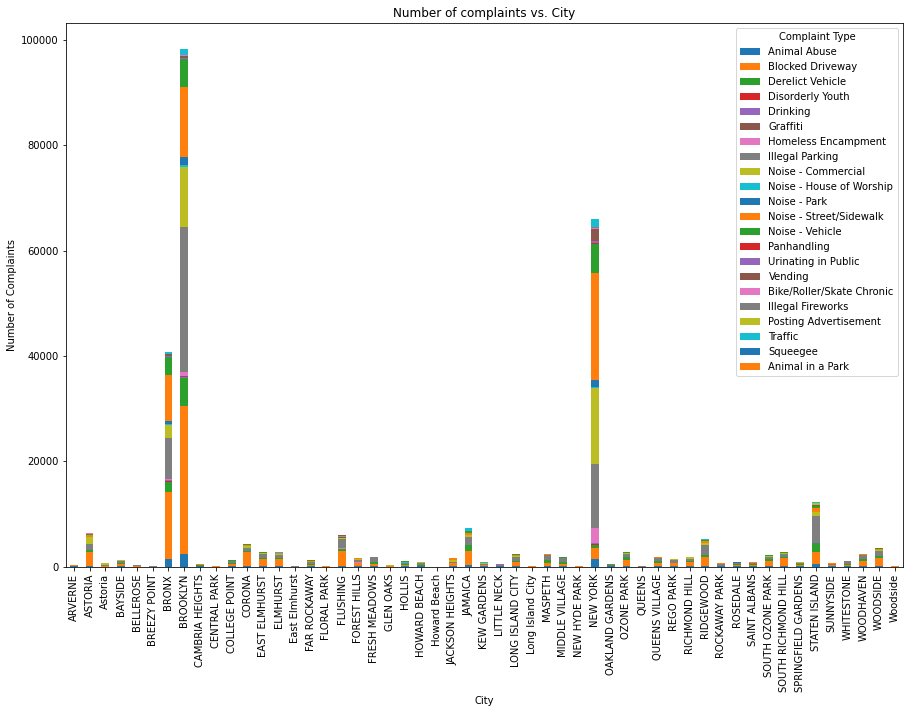

In [16]:
df1=data.groupby(['City','Complaint Type']).size().unstack().fillna(0)
df1.plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('Number of complaints vs. City')

# Conclusion 2: Since maximum number of complaints were filed in Brooklyn, Blocked Driveway was found to be the most frequent complaint lodged in the city of Brooklyn.

[Text(0, 0, 'Illegal Parking'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Noise - Commercial'),
 Text(3, 0, 'Noise - Street/Sidewalk'),
 Text(4, 0, 'Noise - Vehicle'),
 Text(5, 0, 'Traffic'),
 Text(6, 0, 'Derelict Vehicle'),
 Text(7, 0, 'Animal Abuse'),
 Text(8, 0, 'Drinking'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Noise - Park'),
 Text(11, 0, 'Homeless Encampment'),
 Text(12, 0, 'Posting Advertisement'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Graffiti'),
 Text(15, 0, 'Noise - House of Worship'),
 Text(16, 0, 'Bike/Roller/Skate Chronic'),
 Text(17, 0, 'Urinating in Public'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks')]

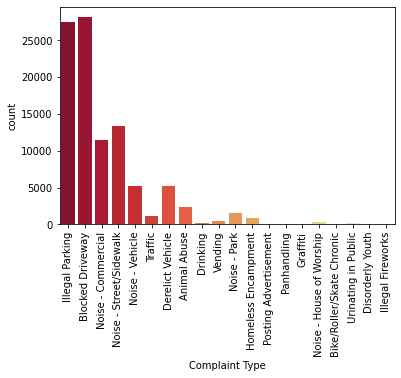

In [17]:
data.loc[(data['City']=='BROOKLYN'),:]['Complaint Type'].value_counts()
plot_3= sns.countplot(x=data.loc[data.City=='BROOKLYN']['Complaint Type'], palette='YlOrRd_r')
plot_3.set_xticklabels(plot_3.get_xticklabels(), rotation=90)

# Conclusion 3 - Most of the complained are in closed status

In [18]:
data.Status.unique()

array(['Closed', 'Open', 'Assigned', 'Draft'], dtype=object)

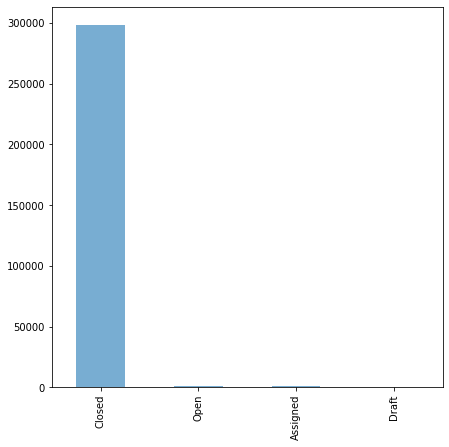

In [19]:
data['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

# Conclusion 4:Top 10 Complaint types and their count

In [20]:
df4= data['Complaint Type'].value_counts().head(10)
df4.nlargest().index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [21]:
df4

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Blocked Driveway'),
 Text(1, 0, 'Illegal Parking'),
 Text(2, 0, 'Noise - Street/Sidewalk'),
 Text(3, 0, 'Noise - Commercial'),
 Text(4, 0, 'Derelict Vehicle'),
 Text(5, 0, 'Noise - Vehicle'),
 Text(6, 0, 'Animal Abuse'),
 Text(7, 0, 'Traffic'),
 Text(8, 0, 'Homeless Encampment'),
 Text(9, 0, 'Noise - Park')]

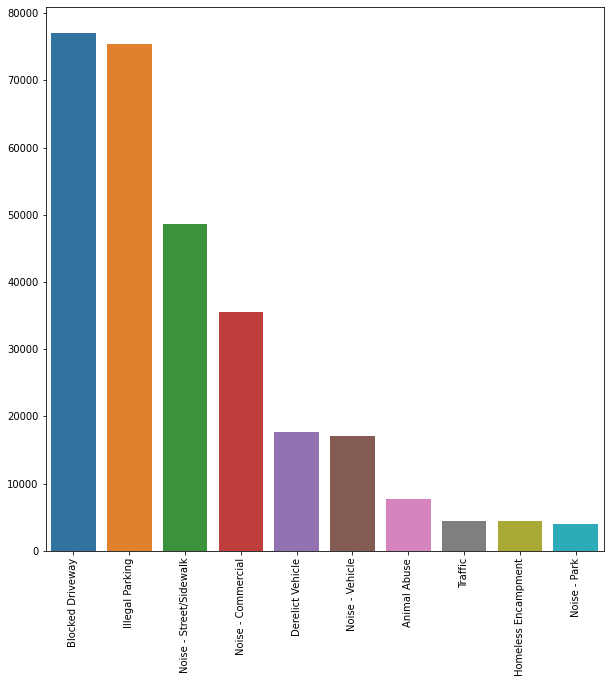

In [22]:
plt.figure(figsize=(10,10))
plot_5= sns.barplot(x=df4.nlargest(10).index, y= df4.nlargest(10).values)
plot_5.set_xticklabels(plot_5.get_xticklabels(), rotation=90)

# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [23]:
df5 = data.groupby(['City','Complaint Type'])['Request_Closing_Time_mins'].mean()
df5.unstack().fillna(0).head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - House of Worship,...,Noise - Vehicle,Panhandling,Urinating in Public,Vending,Bike/Roller/Skate Chronic,Illegal Fireworks,Posting Advertisement,Traffic,Squeegee,Animal in a Park
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,129.217544,151.558095,178.093210,215.475000,14.316667,92.000000,108.887500,138.981897,137.233333,93.731818,...,111.592857,62.0,41.516667,29.000,0.000000,0.000000,0.0,0.000000,0.0,0.0
ASTORIA,300.010133,288.967068,581.354986,174.155556,283.345238,845.704167,295.055208,290.003464,187.981748,121.333333,...,210.550572,69.0,277.542593,296.125,104.358889,166.408333,352.2,324.610993,0.0,0.0
Astoria,0.000000,294.877730,374.169444,0.000000,0.000000,0.000000,0.000000,282.677387,212.513410,0.000000,...,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0
BAYSIDE,196.470721,153.784306,201.586785,178.383333,114.000000,273.094444,172.533333,153.760019,134.020000,212.091667,...,102.505208,0.0,0.000000,112.675,0.000000,0.000000,0.0,91.616667,0.0,0.0
BELLEROSE,763.480952,605.964737,1030.088577,111.000000,235.083333,0.000000,2348.000000,492.187579,404.446396,131.816667,...,154.990000,449.0,452.483333,0.000,294.000000,400.000000,135.6,345.530952,0.0,0.0


# Task 5: Perform a statistical test for the following:

# Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

# Whether the average response time across complaint types is similar or not (overall)
# Are the type of complaint or service requested and location related?

In [24]:
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

<AxesSubplot:>

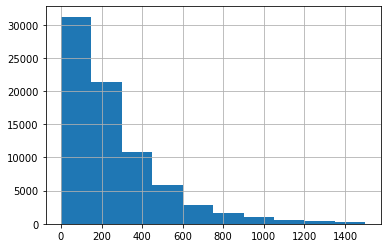

In [25]:
df6= data[data['Complaint Type']== 'Blocked Driveway']['Request_Closing_Time_mins']
df6.hist(range=(0,1500)) 

<AxesSubplot:>

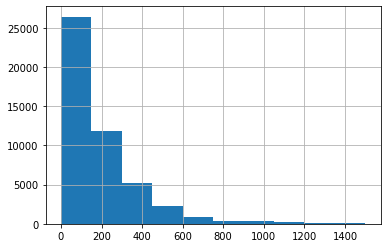

In [26]:
df7= data[data['Complaint Type']== 'Noise - Street/Sidewalk']['Request_Closing_Time_mins']
df7.hist(range=(0,1500)) # Simiar result

In [27]:
# Applying log transformation
dataset={}
for i in data['Complaint Type'].unique():
    dataset[i]= np.log(data[data['Complaint Type']==i]['Request_Closing_Time_mins'])
    


In [28]:
dataset.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'])

<AxesSubplot:>

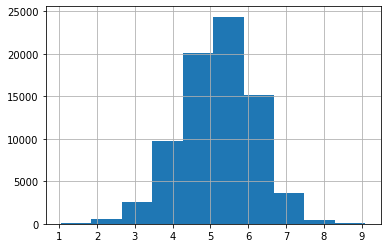

In [29]:
dataset['Blocked Driveway'].hist()

<AxesSubplot:>

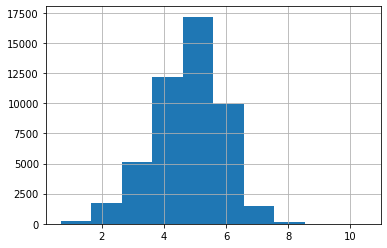

In [30]:
dataset['Noise - Street/Sidewalk'].hist()

<AxesSubplot:>

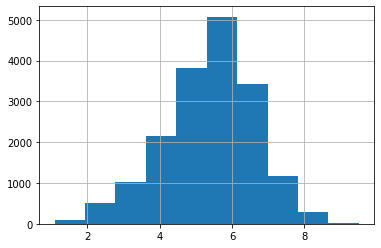

In [31]:
dataset['Derelict Vehicle'].hist()

# ANOVA Analysis (Checking for top 5 complaints)
# Null Hypothesis(H0): The average response time across complaint types is not different
# Alternate Hypothesis(Ha): The average response time across complaint types is different

In [32]:
from scipy.stats import f_oneway

In [34]:
stat,pvalue = f_oneway(dataset['Noise - Street/Sidewalk'], dataset['Blocked Driveway'], dataset['Illegal Parking'], dataset['Derelict Vehicle'], 
                dataset['Noise - Commercial'])
alpha=0.05
if pvalue>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

Null hypothesis is rejected


# Chi Square
# H0:Complaint Type and Location Type are independent
# H1:Complaint Type and Location Type are related

In [35]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=data["Location Type"]
chi_sq["Complaint Type"]=data["Complaint Type"]

chi_sq.dropna(inplace=True)

In [36]:
chi_sq

,Location Type,Complaint Type
0,Street/Sidewalk,Noise - Street/Sidewalk
1,Street/Sidewalk,Blocked Driveway
2,Street/Sidewalk,Blocked Driveway
3,Street/Sidewalk,Illegal Parking
4,Street/Sidewalk,Illegal Parking
...,...,...
300693,Club/Bar/Restaurant,Noise - Commercial
300694,Street/Sidewalk,Blocked Driveway
300695,Club/Bar/Restaurant,Noise - Commercial
300696,Club/Bar/Restaurant,Noise - Commercial


In [37]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [38]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

Dependent (reject H0)
